In [1]:
import requests
import base64
import json
from datetime import datetime, timedelta

# Replace these with your own credentials
client_id = 'XXXXXclient_secret = 'XXXXXXX
# Function to get the access token
def get_access_token(client_id, client_secret):
    auth_url = 'https://accounts.spotify.com/api/token'
    auth_header = base64.b64encode(f'{client_id}:{client_secret}'.encode('utf-8')).decode('utf-8')
    headers = {'Authorization': f'Basic {auth_header}'}
    data = {'grant_type': 'client_credentials'}

    response = requests.post(auth_url, headers=headers, data=data)
    if response.status_code == 200:
        return response.json()['access_token']
    else:
        raise Exception(f'Failed to get access token. Status code: {response.status_code}')

# Function to get the most played song genres from 5 years ago
def get_most_played_genres(access_token):
    api_url = 'https://api.spotify.com/v1/browse/categories'
    headers = {'Authorization': f'Bearer {access_token}'}
    five_years_ago = datetime.now() - timedelta(days=5*365)
    params = {'time_range': 'long_term', 'limit': 10, 'offset': 0, 'country': 'US'}

    response = requests.get(api_url, headers=headers, params=params)
    if response.status_code == 200:
        categories = response.json()['categories']['items']
        most_played_genres = [category['name'] for category in categories]
        return most_played_genres
    else:
        raise Exception(f'Failed to get most played song genres. Status code: {response.status_code}')

# Main program
if __name__ == "__main__":
    access_token = get_access_token(client_id, client_secret)
    most_played_genres = get_most_played_genres(access_token)
    print("Most played song genres from 5 years ago:")
    for genre in most_played_genres:
        print(f"- {genre}")


Most played song genres from 5 years ago:
- Top Lists
- Hip-Hop
- Pop
- Country
- Latin
- Rock
- Summer
- Workout
- R&B
- Dance/Electronic


In [2]:

# Function to get the access token
def get_access_token(client_id, client_secret):
    auth_url = 'https://accounts.spotify.com/api/token'
    auth_header = base64.b64encode(f'{client_id}:{client_secret}'.encode('utf-8')).decode('utf-8')
    headers = {'Authorization': f'Basic {auth_header}'}
    data = {'grant_type': 'client_credentials'}

    response = requests.post(auth_url, headers=headers, data=data)
    if response.status_code == 200:
        return response.json()['access_token']
    else:
        raise Exception(f'Failed to get access token. Status code: {response.status_code}')
# Function to search for artists
def search_artists(access_token, query, limit=50):
    api_url = 'https://api.spotify.com/v1/search'
    headers = {'Authorization': f'Bearer {access_token}'}
    params = {'q': query, 'type': 'artist', 'limit': limit}

    response = requests.get(api_url, headers=headers, params=params)
    if response.status_code == 200:
        artists = response.json()['artists']['items']
        return artists
    else:
        raise Exception(f'Failed to search for artists. Status code: {response.status_code}')

# Main program
if __name__ == "__main__":
    access_token = get_access_token(client_id, client_secret)

    # Search for artists (replace 'rock' with any genre or query)
    artists = search_artists(access_token, 'rock')

    # Get artist names and popularity scores
    artist_popularity = [(artist['name'], artist['popularity']) for artist in artists]

    # Sort artists by popularity and get the top 20
    top_20_artists = sorted(artist_popularity, key=lambda x: x[1], reverse=True)[:20]

    # Print the top 20 artists
    print("Top 20 artists:")
    for idx, (name, popularity) in enumerate(top_20_artists, 1):
        print(f"{idx}. {name} (Popularity: {popularity})")


Top 20 artists:
1. Linkin Park (Popularity: 87)
2. Queen (Popularity: 86)
3. Metallica (Popularity: 84)
4. Red Hot Chili Peppers (Popularity: 84)
5. A$AP Rocky (Popularity: 83)
6. AC/DC (Popularity: 83)
7. Nirvana (Popularity: 83)
8. Fleetwood Mac (Popularity: 82)
9. Guns N' Roses (Popularity: 81)
10. Foo Fighters (Popularity: 80)
11. Maná (Popularity: 79)
12. Led Zeppelin (Popularity: 79)
13. Bon Jovi (Popularity: 79)
14. Aerosmith (Popularity: 78)
15. Soda Stereo (Popularity: 76)
16. Los Enanitos Verdes (Popularity: 74)
17. Jay Rock (Popularity: 74)
18. Van Halen (Popularity: 74)
19. PnB Rock (Popularity: 71)
20. Survivor (Popularity: 69)


In [3]:
import pandas as pd

# Create a DataFrame from the top 20 artists list
top_20_artists_df = pd.DataFrame(top_20_artists, columns=['Artist', 'Popularity'])

# Print the DataFrame
print(top_20_artists_df)


                   Artist  Popularity
0             Linkin Park          87
1                   Queen          86
2               Metallica          84
3   Red Hot Chili Peppers          84
4              A$AP Rocky          83
5                   AC/DC          83
6                 Nirvana          83
7           Fleetwood Mac          82
8           Guns N' Roses          81
9            Foo Fighters          80
10                   Maná          79
11           Led Zeppelin          79
12               Bon Jovi          79
13              Aerosmith          78
14            Soda Stereo          76
15    Los Enanitos Verdes          74
16               Jay Rock          74
17              Van Halen          74
18               PnB Rock          71
19               Survivor          69


In [ ]:

# Main program
if __name__ == "__main__":
    access_token = get_access_token(client_id, client_secret)

    # Search for rock artists
    rock_artists = search_artists(access_token, 'rock', limit=50)

    # Get artist names, popularity scores, and follower counts
    artist_data = [(artist['name'], artist['popularity'], artist['followers']['total']) for artist in rock_artists]

    # Sort artists by popularity and get the top 10
    top_20_rock_artists = sorted(artist_data, key=lambda x: x[1], reverse=True)[:20]

    # Create a DataFrame with the top 10 artists, their popularity, and follower counts
    top_20_rock_artists_df = pd.DataFrame(top_20_rock_artists, columns=['Artist', 'Popularity', 'Followers'])

    # Print the DataFrame
    print("Top 20 rock artists:")
    print(top_20_rock_artists_df)


Top 20 rock artists:
                   Artist  Popularity  Followers
0             Linkin Park          87   22971373
1                   Queen          86   45849897
2               Metallica          84   24164890
3   Red Hot Chili Peppers          84   19377055
4              A$AP Rocky          83   12004031
5                   AC/DC          83   26008062
6                 Nirvana          83   17207435
7           Fleetwood Mac          82    9564843
8           Guns N' Roses          81   28147015
9            Foo Fighters          80   10771113
10                   Maná          79    9455035
11           Led Zeppelin          79   13187900
12               Bon Jovi          79   11985986
13              Aerosmith          78   13269956
14            Soda Stereo          76    7606962
15    Los Enanitos Verdes          74    3539191
16               Jay Rock          74    1375499
17              Van Halen          74    5308553
18               PnB Rock          71    3750809

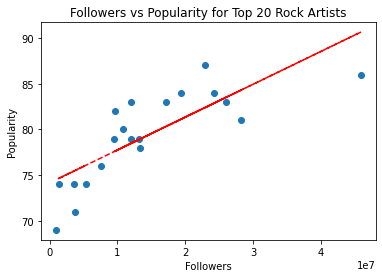

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a scatter plot using the DataFrame columns
plt.scatter(top_20_rock_artists_df['Followers'], top_20_rock_artists_df['Popularity'])

# Calculate the trend line
z = np.polyfit(top_20_rock_artists_df['Followers'], top_20_rock_artists_df['Popularity'], 1)
p = np.poly1d(z)

# Plot the trend line
plt.plot(top_20_rock_artists_df['Followers'], p(top_20_rock_artists_df['Followers']), "r--")

# Add labels and title to the plot
plt.xlabel('Followers')
plt.ylabel('Popularity')
plt.title('Followers vs Popularity for Top 20 Rock Artists')

# Display the plot
plt.show()


In [ ]:
# Function to get the artist object
def get_artist_object(access_token, artist_id):
    api_url = f'https://api.spotify.com/v1/artists/{artist_id}'
    headers = {'Authorization': f'Bearer {access_token}'}
    before_date = (datetime.now() - timedelta(days=3*365)).strftime('%Y-%m-%d')
    params = {'before': before_date}

    response = requests.get(api_url, headers=headers, params=params)
    if response.status_code == 200:
        artist_object = response.json()
        return artist_object
    else:
        raise Exception(f'Failed to get artist object. Status code: {response.status_code}')

# Main program
if __name__ == "__main__":
    access_token = get_access_token(client_id, client_secret)

    # Search for rock artists
    rock_artists = search_artists(access_token, 'rock', limit=50)

    # Get artist names, popularity scores, and follower counts from 3 years ago
    artist_data = []
    for artist_name, artist_popularity in top_20_rock_artists:
        for artist in rock_artists:
            if artist_name == artist['name']:
                artist_id = artist['id']
                break
        artist_object = get_artist_object(access_token, artist_id)
        artist_followers = artist_object['followers']['total']
        artist_data.append((artist_name, artist_popularity, artist_followers))

    # Sort artists by popularity and get the top 10
    top_20_rock_artists_followers = sorted(artist_data, key=lambda x: x[1], reverse=True)[:20]

    # Create a DataFrame with the top 10 artists, their popularity, and follower counts
    top_20_rock_artists_followers_df = pd.DataFrame(top_20_rock_artists_followers, columns=['Artist', 'Popularity', 'Followers from 3 Years Ago'])

    # Print the DataFrame
    print("Top 20 rock artists with follower count from 3 years ago:")
    print(top_20_rock_artists_followers_df)


ValueError: too many values to unpack (expected 2)